In [1]:
from datetime import date, timedelta

import polars as pl

import synthx as sx

### time => int

In [2]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=1,
    intervention_units=1,
    intervention_time=40,
    intervention_effect=1,
    noise_effect=100,
    loc=100,
    scale=300,
    seed=42,
)
df.head()

unit,time,y,covariate_1,covariate_2,covariate_3
i64,i64,f64,f64,f64,f64
1,1,42478.426445,532.381987,-330.758645,448.949126
1,2,641517.222302,532.381987,-330.758645,448.949126
1,3,150733.018466,532.381987,-330.758645,448.949126
1,4,-219719.391559,532.381987,-330.758645,448.949126
1,5,239662.040829,532.381987,-330.758645,448.949126


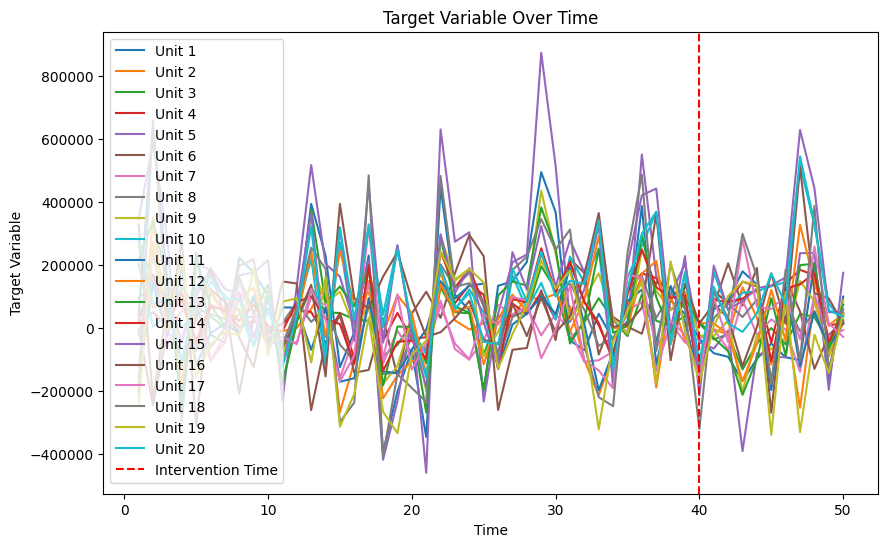

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
)
dataset.plot()

### time => date

In [4]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=1,
    intervention_units=1,
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0,
    seed=42,
)
df = df.with_columns((pl.datetime(2022,1,1) + pl.duration(weeks='time')).cast(pl.Date).alias('time'))
df.head()

unit,time,y,covariate_1,covariate_2,covariate_3
i64,date,f64,f64,f64,f64
1,2022-01-08,0.204806,1.441273,-1.435862,1.163164
1,2022-01-15,7.307301,1.441273,-1.435862,1.163164
1,2022-01-22,1.298995,1.441273,-1.435862,1.163164
1,2022-01-29,-2.919666,1.441273,-1.435862,1.163164
1,2022-02-05,2.05518,1.441273,-1.435862,1.163164


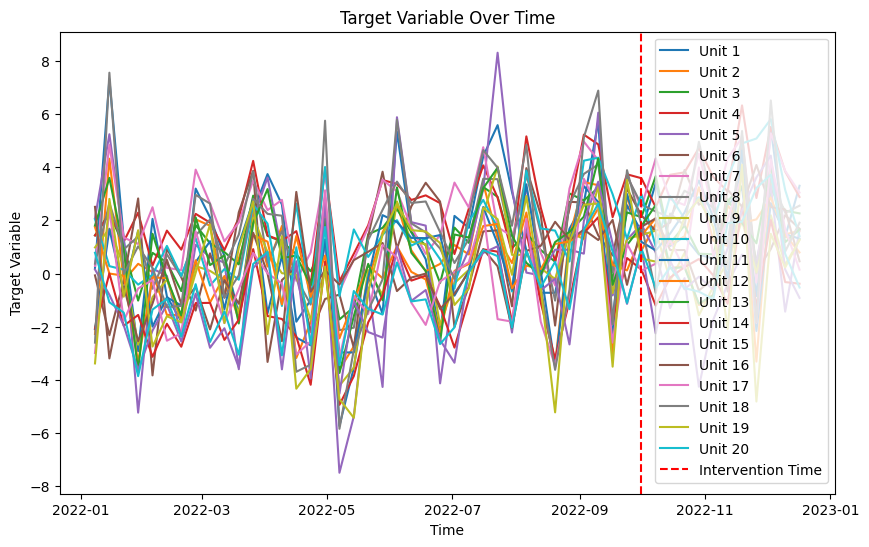

In [5]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=date(2022, 10, 1),
)
dataset.plot()